Author: Tony Malayil

Date: July 9, 2024

CAP 4613 - 001

[Python] Application of Keras to build, compile, and train a neural network as a three-class classifier for MNIST dataset (0 vs. 3 vs. 8):

a. Use mnist function in keras.datasets to load MNIST dataset and split it into training and testing sets. Then, randomly select 20% of the training images along with their corresponding labels to be the validation data.


In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

classes = [0, 3, 8]
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("X_train size is", x_train.shape[0])
print("Y_train size is", y_train.shape[0])
print("X_test size is", x_test.shape[0])
print("Y_test size is", y_test.shape[0])

print("Image width and height size is", x_train.shape[1],"x", x_train.shape[2])

x_train_038 = x_train[np.logical_or.reduce((y_train == 0, y_train == 3, y_train == 8)), 0:28, 0:28]
y_train_038 = y_train[np.logical_or.reduce((y_train == 0, y_train == 3, y_train == 8))]

x_test_038 = x_test[np.logical_or.reduce((y_test == 0, y_test == 3, y_test == 8)), 0:28, 0:28]
y_test_038 = y_test[np.logical_or.reduce((y_test == 0, y_test == 3, y_test == 8))]

print("\nX_train_01 size is", x_train_038.shape[0])
print("Y_train_01 size is", y_train_038.shape[0])
print("X_test_01 size is", x_test_038.shape[0])
print("Y_test_01 size is", y_test_038.shape[0])

num_train_img = np.arange(0, x_train_038.shape[0])
train_ind = np.random.permutation(num_train_img)

x_train_038 = x_train_038[train_ind,:,:]
y_train_038 = y_train_038[train_ind]

split = int(0.2*x_train_038.shape[0])

x_valid_038 = x_train_038[0:split,:,:]
y_valid_038 = y_train_038[0:split]

print("\nX_valid_038 has a size of", x_valid_038.shape[0], "images, while Y_valid_038 has a size of", y_valid_038.shape[0])

x_train_038 = x_train_038[split:,:,:]
y_train_038 = y_train_038[split:]
print("X_train_038 size is", x_train_038.shape[0])
print("Y_train_038 size is", y_train_038.shape[0])

11490434/11490434 [==============================] - 0s 0us/step
X_train size is 60000
Y_train size is 60000
X_test size is 10000
Y_test size is 10000
Image width and height size is 28 x 28

X_train_01 size is 17905
Y_train_01 size is 17905
X_test_01 size is 2964
Y_test_01 size is 2964

X_valid_038 has a size of 3581 images, while Y_valid_038 has a size of 3581
X_train_038 size is 14324
Y_train_038 size is 14324


b. Feature extraction: average the pixel values in the quadrants in each image to generate a feature vector of 4 values for each image.

In [2]:
def feat_extract(images):
  width = images.shape[1]
  height = images.shape[2]
  features = np.zeros((images.shape[0], 4))
  features_temp = np.sum(images[:, 0:int(width/2), 0:int(height/2)], axis=2)    #Quad 1
  features[:, 0] = np.sum(features_temp, axis=1) / (width*height/4)
  features_temp = np.sum(images[:, 0:int(width/2), int(height/2):], axis=2)     #Quad 2
  features[:, 1] = np.sum(features_temp, axis=1) / (width*height/4)
  features_temp = np.sum(images[:, int(width/2):, 0:int(height/2)], axis=2)     #Quad 3
  features[:, 2] = np.sum(features_temp, axis=1) / (width*height/4)
  features_temp = np.sum(images[:, int(width/2):, int(height/2):], axis=2)     #Quad 4
  features[:, 3] = np.sum(features_temp, axis=1) / (width*height/4)
  return features

c. Convert the label vectors for all the sets to binary class matrices using to_categorical() Keras function.

In [3]:
import tensorflow as tf
from keras.utils import to_categorical

classes = [0, 1, 2]

y_train_temp = np.copy(y_train_038)
y_train_temp[y_train_temp==3] = 1
y_train_temp[y_train_temp==8] = 2

y_valid_temp = np.copy(y_valid_038)
y_valid_temp[y_valid_temp==3] = 1
y_valid_temp[y_valid_temp==8] = 2

y_test_temp = np.copy(y_test_038)
y_test_temp[y_test_temp==3] = 1
y_test_temp[y_test_temp==8] = 2

y_train_038_c = to_categorical(y_train_temp, num_classes = len(classes))
y_valid_038_c = to_categorical(y_valid_temp, num_classes = len(classes))
y_test_038_c = to_categorical(y_test_temp, num_classes = len(classes))

d. Build, compile, train, and then evaluate:
  1. Build a neural network with 1 layer that contains 16 nodes using the Keras library.
  2. Compile the network. Make sure to select the correct loss function for this classification problem. Use stochastic gradient descent learning (SGD, learning rate of 0.0001). Explain your selection of the loss function.
  3. Train the network for 30 epochs and a batch size of 16.
  4. Plot the training loss (i.e., the learning curve) for all the epochs.
  5. Use the evaluate() Keras function to find the training and validation loss and accuracy.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

feature_train = feat_extract(x_train_038)
feature_val = feat_extract(x_valid_038)
feature_test = feat_extract(x_test_038)

model_a = Sequential()
model_a.add(Dense(input_dim = 4, units = 16, activation = 'tanh'))
model_a.add(Dense(units = len(classes), activation = 'softmax' ))
model_a.summary()

opt = tf.keras.optimizers.SGD(learning_rate = 0.0001)

#Loss function explanation - We use categorical cross-entropy since it is a multiclass identification
model_a.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model_a.fit(feature_train, y_train_038_c, batch_size = 16, epochs = 30, verbose = 1)

score = model_a.evaluate(feature_train, y_train_038_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

score = model_a.evaluate(feature_val, y_valid_038_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

def plot_curve(accuracy_train, loss_train):
  epochs = np.arange(loss_train.shape[0])
  plt.subplot(1, 2, 1)
  plt.plot(epochs, accuracy_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Training Loss')

plt.figure(figsize = [9,5])
acc_curve = np.array(history.history['accuracy'])
loss_curve = np.array(history.history['loss'])

print("\n")
plot_curve(acc_curve, loss_curve)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
896/896 [==============================] - 2s 1ms/step - loss: 1.1321 - accuracy: 0.3358
Epoch 2/30
896/896 [==============================] - 1s 1ms/step - loss: 1.0648 - accuracy: 0.4388
Epoch 3/30
896/896 [==============================] - 1s 1ms/step - loss: 1.0369 - accuracy: 0.5327
Epoch 4/30
896/896 [==============================] - 1s 1ms/step - loss: 1.0195 - accuracy: 0.5400
Epoch 5/30
8

Model 2 - 1 layer, 64 nodes

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 64)                320       
                                                                 
 dense_102 (Dense)           (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
896/896 [==============================] - 2s 1ms/step - loss: 1.1384 - accuracy: 0.3933
Epoch 2/30
896/896 [==============================] - 1s 1ms/step - loss: 0.9992 - accuracy: 0.5059
Epoch 3/30
896/896 [==============================] - 1s 1ms/step - loss: 0.9660 - accuracy: 0.5431
Epoch 4/30
896/896 [==============================] - 2s 2ms/step - loss: 0.9377 - accuracy: 0.5739
Epoch 5/30
896/896 

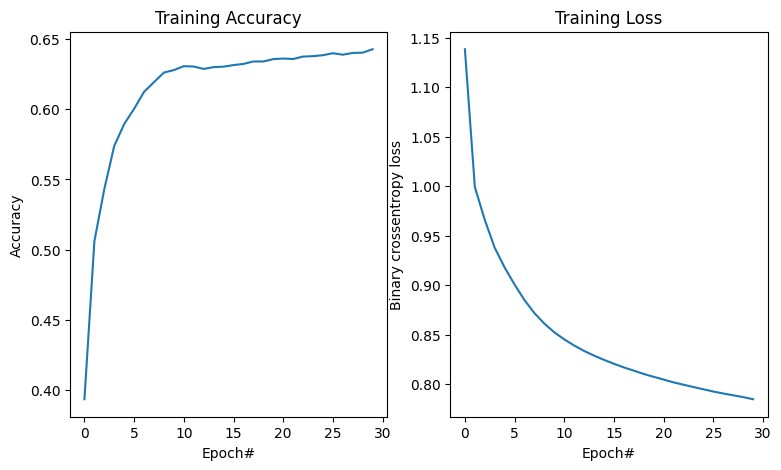

In [ ]:
model_b = Sequential()
model_b.add(Dense(input_dim = 4, units = 64, activation = 'tanh'))
model_b.add(Dense(units = len(classes), activation = 'softmax' ))
model_b.summary()

opt = tf.keras.optimizers.SGD(learning_rate = 0.0001)

model_b.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model_b.fit(feature_train, y_train_038_c, batch_size = 16, epochs = 30, verbose = 1)

score = model_b.evaluate(feature_train, y_train_038_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

score = model_b.evaluate(feature_val, y_valid_038_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

plt.figure(figsize = [9,5])
acc_curve = np.array(history.history['accuracy'])
loss_curve = np.array(history.history['loss'])

print("\n")
plot_curve(acc_curve, loss_curve)

Model 3 - 1 layer, 128 nodes

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 128)               640       
                                                                 
 dense_106 (Dense)           (None, 3)                 387       
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
896/896 [==============================] - 2s 2ms/step - loss: 0.9655 - accuracy: 0.5439
Epoch 2/30
896/896 [==============================] - 1s 1ms/step - loss: 0.8595 - accuracy: 0.6359
Epoch 3/30
896/896 [==============================] - 1s 1ms/step - loss: 0.8215 - accuracy: 0.6477
Epoch 4/30
896/896 [==============================] - 1s 1ms/step - loss: 0.8050 - accuracy: 0.6527
Epoch 5/30
896/89

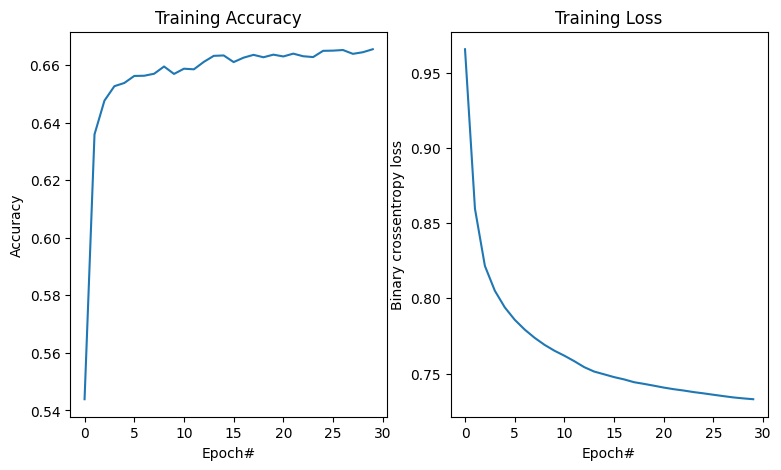

In [ ]:
model_c = Sequential()
model_c.add(Dense(input_dim = 4, units = 128, activation = 'tanh'))
model_c.add(Dense(units = len(classes), activation = 'softmax' ))
model_c.summary()

opt = tf.keras.optimizers.SGD(learning_rate = 0.0001)

model_c.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model_c.fit(feature_train, y_train_038_c, batch_size = 16, epochs = 30, verbose = 1)

score = model_c.evaluate(feature_train, y_train_038_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

score = model_c.evaluate(feature_val, y_valid_038_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

plt.figure(figsize = [9,5])
acc_curve = np.array(history.history['accuracy'])
loss_curve = np.array(history.history['loss'])

print("\n")
plot_curve(acc_curve, loss_curve)

Model 4 - 2 layer, 128 nodes, 16 nodes


Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 128)               640       
                                                                 
 dense_108 (Dense)           (None, 16)                2064      
                                                                 
 dense_109 (Dense)           (None, 3)                 51        
                                                                 
Total params: 2755 (10.76 KB)
Trainable params: 2755 (10.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
896/896 [==============================] - 2s 1ms/step - loss: 1.0248 - accuracy: 0.4778
Epoch 2/30
896/896 [==============================] - 1s 1ms/step - loss: 0.9265 - accuracy: 0.5834
Epoch 3/30
896/896 [==============================] - 1s 1ms/step - loss: 0.8819 - 

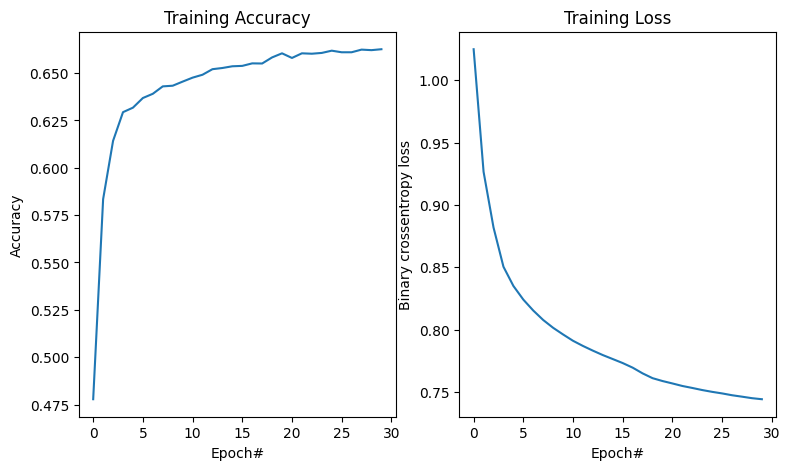

In [ ]:
model_d = Sequential()
model_d.add(Dense(input_dim = 4, units = 128, activation = 'tanh'))
model_d.add(Dense(units = 16, activation = 'tanh'))
model_d.add(Dense(units = len(classes), activation = 'softmax' ))
model_d.summary()

opt = tf.keras.optimizers.SGD(learning_rate = 0.0001)

model_d.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model_d.fit(feature_train, y_train_038_c, batch_size = 16, epochs = 30, verbose = 1)

score = model_d.evaluate(feature_train, y_train_038_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

score = model_d.evaluate(feature_val, y_valid_038_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

plt.figure(figsize = [9,5])
acc_curve = np.array(history.history['accuracy'])
loss_curve = np.array(history.history['loss'])

print("\n")
plot_curve(acc_curve, loss_curve)

Model 5 - 2 layer, 128 nodes, 64 nodes

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 256)               1280      
                                                                 
 dense_111 (Dense)           (None, 16)                4112      
                                                                 
 dense_112 (Dense)           (None, 3)                 51        
                                                                 
Total params: 5443 (21.26 KB)
Trainable params: 5443 (21.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
896/896 [==============================] - 3s 2ms/step - loss: 0.9930 - accuracy: 0.5423
Epoch 2/30
896/896 [==============================] - 2s 2ms/step - loss: 0.8859 - accuracy: 0.6220
Epoch 3/30
896/896 [==============================] - 1s 1ms/step - loss: 0.8449 - 

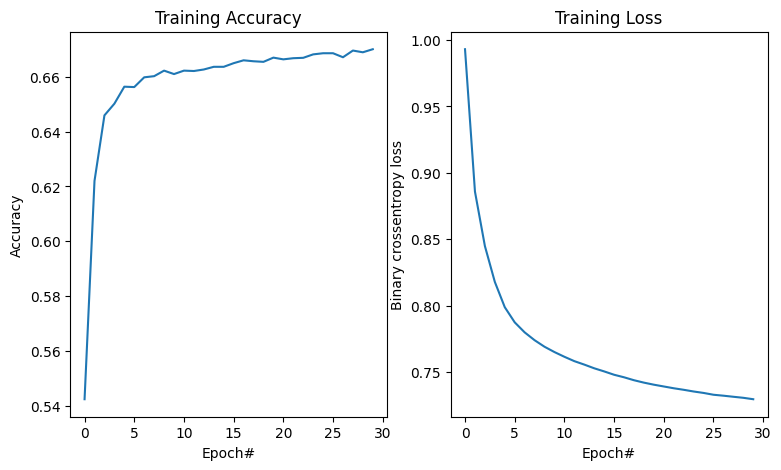

In [ ]:
model_e = Sequential()
model_e.add(Dense(input_dim = 4, units = 256, activation = 'tanh'))
model_e.add(Dense(units = 16, activation = 'tanh'))
model_e.add(Dense(units = len(classes), activation = 'softmax' ))
model_e.summary()

opt = tf.keras.optimizers.SGD(learning_rate = 0.0001)

model_e.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model_e.fit(feature_train, y_train_038_c, batch_size = 16, epochs = 30, verbose = 1)

score = model_e.evaluate(feature_train, y_train_038_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

score = model_e.evaluate(feature_val, y_valid_038_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

plt.figure(figsize = [9,5])
acc_curve = np.array(history.history['accuracy'])
loss_curve = np.array(history.history['loss'])

print("\n")
plot_curve(acc_curve, loss_curve)

f. What behavior do you observe in the training loss and the validation loss when you increase the number of layers and nodes in the previous table. Which model is more suitable in this problem? Explain.

As the number of layers and nodes increased, the training loss and validation loss decreased. The most suitable model in this problem would be Model 5 (e), the model with the most layers and nodes, as it had the lowest training loss and validation loss.

g. Evaluate the selected model in part (e) on the testing set and report the testing loss and accuracy.

Epoch 1/30
186/186 [==============================] - 1s 1ms/step - loss: 0.7340 - accuracy: 0.6535
Epoch 2/30
186/186 [==============================] - 0s 2ms/step - loss: 0.7315 - accuracy: 0.6606
Epoch 3/30
186/186 [==============================] - 0s 2ms/step - loss: 0.7301 - accuracy: 0.6603
Epoch 4/30
186/186 [==============================] - 0s 2ms/step - loss: 0.7289 - accuracy: 0.6603
Epoch 5/30
186/186 [==============================] - 0s 2ms/step - loss: 0.7286 - accuracy: 0.6606
Epoch 6/30
186/186 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.6653
Epoch 7/30
186/186 [==============================] - 0s 1ms/step - loss: 0.7273 - accuracy: 0.6633
Epoch 8/30
186/186 [==============================] - 0s 2ms/step - loss: 0.7265 - accuracy: 0.6633
Epoch 9/30
186/186 [==============================] - 0s 2ms/step - loss: 0.7265 - accuracy: 0.6630
Epoch 10/30
186/186 [==============================] - 0s 2ms/step - loss: 0.7260 - accuracy: 0.6646

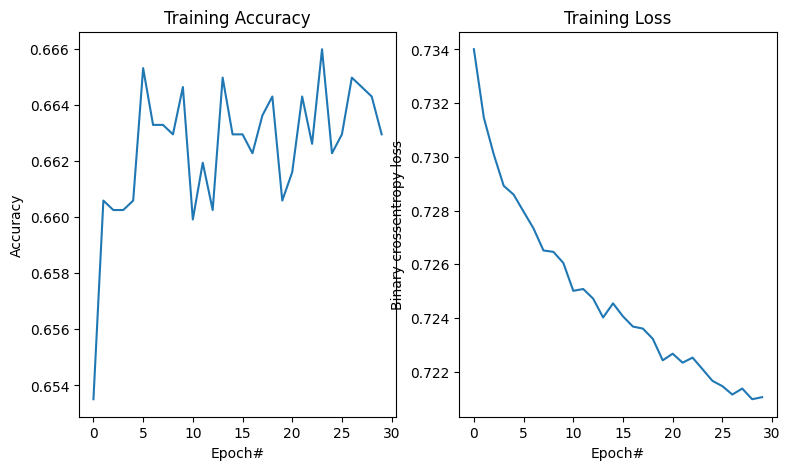

In [ ]:
model_e.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model_e.fit(feature_test, y_test_038_c, batch_size = 16, epochs = 30, verbose = 1)

score = model_e.evaluate(feature_test, y_test_038_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

plt.figure(figsize = [9,5])
acc_curve = np.array(history.history['accuracy'])
loss_curve = np.array(history.history['loss'])

print("\n")
plot_curve(acc_curve, loss_curve)

The testing loss was 0.719, and the testing accuracy was 0.669